In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
datos = pd.read_csv('data_equilibrada.csv')
datos.tokens=datos.tokens.apply(literal_eval)
bow = pd.read_csv('bow.csv')
tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)
X=tfidf.values
y=datos.etiquetas.values

In [ ]:
knn=KNeighborsClassifier(n_neighbors=14,metric='cosine',weights='distance',n_jobs=-1)
cv_knn=cross_validate(knn, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_knn['test_accuracy'].std()/cv_knn['test_accuracy'].mean())
pd.DataFrame(cv_knn).describe()

Coeficiente de variacion: 0.01819275395510173


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.198768,1.063831,0.848563,0.848754,0.848563
std,0.070603,0.319638,0.015839,0.015479,0.015839
min,0.110705,0.576457,0.817837,0.819593,0.817837
25%,0.135139,0.718328,0.837287,0.837605,0.837287
50%,0.182014,1.153956,0.851044,0.851256,0.851044
75%,0.277757,1.297329,0.859791,0.859664,0.859791
max,0.335104,1.560368,0.882353,0.882445,0.882353


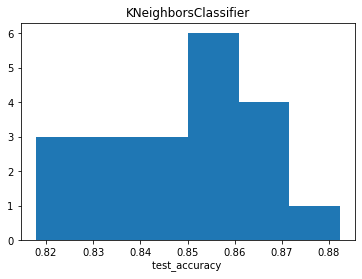

In [ ]:
plt.hist(cv_knn['test_accuracy'],bins=6)
plt.title("KNeighborsClassifier")
plt.xlabel("test_accuracy ")
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=80,class_weight='balanced')
cv_dt=cross_validate(dt, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_dt['test_accuracy'].std()/cv_dt['test_accuracy'].mean())
pd.DataFrame(cv_dt).describe()

Coeficiente de variacion: 0.012812929632479804


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.870347,0.006832,0.813808,0.814302,0.813808
std,0.662300,0.002514,0.010698,0.010471,0.010698
min,3.990575,0.002964,0.798861,0.799115,0.798861
25%,4.225452,0.004738,0.806084,0.806735,0.806084
50%,4.940229,0.006981,0.813865,0.814058,0.813865
75%,5.382048,0.008976,0.818051,0.818975,0.818051
max,5.931122,0.010971,0.838403,0.839000,0.838403


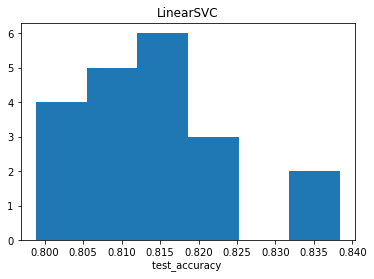

In [ ]:
plt.hist(cv_dt['test_accuracy'],bins=6)
plt.title("LinearSVC")
plt.xlabel("test_accuracy ")
plt.show()

In [ ]:
logreg = LogisticRegression(C=3,l1_ratio=0.85,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
cv_logreg=cross_validate(logreg, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_logreg['test_accuracy'].std()/cv_logreg['test_accuracy'].mean())
pd.DataFrame(cv_logreg).describe()

Coeficiente de variacion: 0.028723351525841757


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,115.061811,0.004991,0.764342,0.765044,0.764342
std,19.332665,0.001515,0.022525,0.022354,0.022525
min,89.907816,0.002991,0.724858,0.725354,0.724858
25%,93.044400,0.003989,0.749526,0.749644,0.749526
50%,127.079669,0.005240,0.765435,0.766475,0.765435
75%,131.057233,0.005984,0.777669,0.778080,0.777669
max,136.127417,0.009005,0.806452,0.805586,0.806452


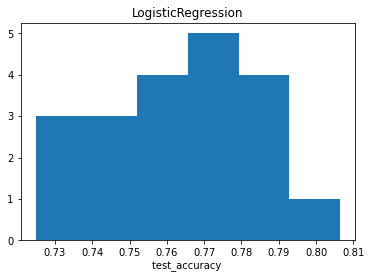

In [ ]:
plt.hist(cv_logreg['test_accuracy'],bins=6)
plt.title("LogisticRegression")
plt.xlabel("test_accuracy ")
plt.show()

In [ ]:
svm = LinearSVC(C=0.4)
cv_svm=cross_validate(svm, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
print("Coeficiente de variacion:",cv_svm['test_accuracy'].std()/cv_svm['test_accuracy'].mean())
pd.DataFrame(cv_svm).describe()

Coeficiente de variacion: 0.02757104869691628


,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.602621,0.006479,0.763487,0.764114,0.763487
std,0.092823,0.001934,0.021597,0.021376,0.021597
min,0.523444,0.002991,0.711575,0.712185,0.711575
25%,0.552414,0.005327,0.755218,0.756731,0.755218
50%,0.561969,0.006212,0.765433,0.765562,0.765433
75%,0.583418,0.007977,0.774194,0.774438,0.774194
max,0.821676,0.009973,0.800759,0.800049,0.800759


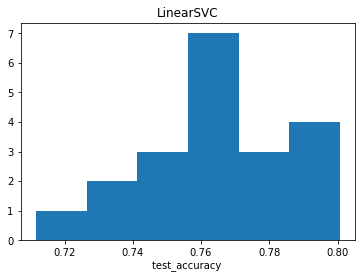

In [ ]:
plt.hist(cv_svm['test_accuracy'],bins=6)
plt.title("LinearSVC")
plt.xlabel("test_accuracy ")
plt.show()

In [ ]:
datos = pd.read_csv('data_equilibrada.csv')
datos.tokens=datos.tokens.apply(literal_eval)
bow = pd.read_csv('bow.csv')
tfidf=pd.DataFrame(TfidfVectorizer(vocabulary=bow.token.values).fit_transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)
X=tfidf.values
y=datos.etiquetas.values

In [ ]:
outliers = pd.read_csv('outliers_medianas_2.csv')
datos.drop(index=outliers.outliers.values,inplace=True)

In [ ]:
logreg = LogisticRegression(C=5,l1_ratio=0.35,penalty='elasticnet',max_iter=1000,solver='saga',multi_class='multinomial',n_jobs=-1)
cv_logreg=cross_validate(logreg, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
pd.DataFrame(cv_logreg).describe()

,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,52.583980,0.009128,0.765955,0.766680,0.765955
std,9.315958,0.005042,0.022431,0.022202,0.022431
min,40.566786,0.001996,0.722960,0.723651,0.722960
25%,41.759176,0.003989,0.751423,0.751894,0.751423
50%,58.703253,0.011968,0.769962,0.770494,0.769962
75%,59.815718,0.012994,0.779886,0.780527,0.779886
max,62.251684,0.015035,0.810247,0.809448,0.810247


In [ ]:
svm = LinearSVC(C=0.3)
cv_svm=cross_validate(svm, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
pd.DataFrame(cv_svm).describe()

,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.456987,0.005335,0.761398,0.761952,0.761398
std,0.060063,0.001179,0.023159,0.022945,0.023159
min,0.372008,0.003988,0.707780,0.708137,0.707780
25%,0.391453,0.004984,0.753795,0.753320,0.753795
50%,0.487711,0.004987,0.763533,0.763652,0.763533
75%,0.497933,0.005983,0.776091,0.776222,0.776091
max,0.535080,0.007979,0.804554,0.803658,0.804554


In [ ]:
dt = DecisionTreeClassifier(max_depth=60,class_weight='balanced')
cv_dt=cross_validate(dt, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
pd.DataFrame(cv_dt).describe()

,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,4.687454,0.007037,0.804315,0.804290,0.804315
std,0.718613,0.002109,0.012464,0.012084,0.012464
min,3.746005,0.003985,0.787476,0.787314,0.787476
25%,3.882845,0.004988,0.793169,0.795641,0.793169
50%,4.991447,0.006982,0.800570,0.801255,0.800570
75%,5.271675,0.008242,0.810451,0.809828,0.810451
max,5.566654,0.011016,0.829222,0.829535,0.829222


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9,metric='cosine',weights='distance',n_jobs=-1)
cv_knn=cross_validate(knn, X, y, cv=20,scoring=('accuracy','f1_weighted','recall_weighted'),n_jobs=-1)
pd.DataFrame(cv_knn).describe()

,fit_time,score_time,test_accuracy,test_f1_weighted,test_recall_weighted
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.217827,1.296155,0.845810,0.845879,0.845810
std,0.107581,0.506395,0.016336,0.016043,0.016336
min,0.111702,0.503019,0.810247,0.811415,0.810247
25%,0.114445,0.937699,0.833017,0.833119,0.833017
50%,0.193484,1.184167,0.848055,0.847881,0.848055
75%,0.307428,1.787218,0.857890,0.857618,0.857890
max,0.436425,2.099457,0.872865,0.872295,0.872865


In [ ]:
import joblib

In [ ]:
datos = pd.read_csv('data_equilibrada.csv')
datos.tokens=datos.tokens.apply(literal_eval)
bow = pd.read_csv('bow.csv')

In [ ]:
vectorizer=TfidfVectorizer(vocabulary=bow.token.values).fit(datos['tokens'].str.join(" "))
tfidf=pd.DataFrame(vectorizer.transform(datos['tokens'].str.join(" ")).toarray(), columns=bow.token.values)

In [ ]:
joblib.dump(vectorizer,'vectorizer_externo.joblib')

['vectorizer_externo.joblib']

In [ ]:
modelo=KNeighborsClassifier(n_neighbors=14,metric='cosine',weights='distance',n_jobs=-1).fit(X, y)

In [ ]:
joblib.dump(modelo,'modelo_externo.joblib')

['modelo_externo.joblib']